In [13]:
import pandas as pd
df =pd.read_csv("grand_merge.csv")

In [14]:
year_counts = df['NUMINVES'].value_counts()
year_counts

NUMINVES
2006    22708
2007    22694
2009    22690
2010    22687
2008    22675
17      22663
2004    22096
2003    21133
2002    21006
2001    20631
18      20250
2005    20222
2018    20204
16      20204
2016    20204
2020    20204
2017    20200
23      19205
2000    18038
Name: count, dtype: int64

In [15]:


# Asumiendo que ya tienes el dataframe llamado 'df'

# Paso 1: Reemplazar los valores incorrectos en la columna 'NUMINVES'
df['NUMINVES'] = df['NUMINVES'].replace({
    16: 2011,
    17: 2013,
    18: 2015,
    23: 2023
})




In [16]:
# Contar las ocurrencias de cada valor en la columna 'APOYO'
apoyo_counts = df['APOYO'].value_counts()

# Contar las ocurrencias de cada valor en la columna 'SATISFACCION'
satisfaccion_counts = df['SATISFACCION'].value_counts()

# Mostrar los valores que se repiten en cada columna
print("Valores que se repiten en 'APOYO':")
print(apoyo_counts)

print("\nValores que se repiten en 'SATISFACCION':")
print(satisfaccion_counts)


Valores que se repiten en 'APOYO':
APOYO
1.0    226006
3.0     79430
2.0     61010
Name: count, dtype: int64

Valores que se repiten en 'SATISFACCION':
SATISFACCION
3.0    161235
2.0    104381
4.0     77802
1.0     34740
Name: count, dtype: int64


In [17]:
# Verificar si hay valores NaN en las columnas 'APOYO' y 'SATISFACCION'

# Verificar si hay NaN en 'APOYO'
apoyo_nas = df['APOYO'].isna().sum()

# Verificar si hay NaN en 'SATISFACCION'
satisfaccion_nas = df['SATISFACCION'].isna().sum()

# Mostrar los resultados
print(f"Valores NaN en 'APOYO': {apoyo_nas}")
print(f"Valores NaN en 'SATISFACCION': {satisfaccion_nas}")


Valores NaN en 'APOYO': 33268
Valores NaN en 'SATISFACCION': 21556


In [18]:
df_clean =df.dropna()


In [19]:
paises_dict = {
    32: "Argentina",
    68: "Bolivia",
    76: "Brasil",
    152: "Chile",
    170: "Colombia",
    188: "Costa Rica",
    214: "Rep. Dominicana",
    218: "Ecuador",
    222: "El Salvador",
    320: "Guatemala",
    340: "Honduras",
    484: "México",
    558: "Nicaragua",
    591: "Panamá",
    600: "Paraguay",
    604: "Perú",
    858: "Uruguay",
    862: "Venezuela"
}

# Lista de códigos de países latinoamericanos
paises_latinoamericanos = list(paises_dict.keys())

# Filtrar el DataFrame para mantener solo los países latinoamericanos
df_clean= df_clean[df_clean['IDENPA'].isin(paises_latinoamericanos)]

# Agregar una nueva columna para los nombres de los países
df_clean['Pais'] = df_clean['IDENPA'].map(paises_dict)

# Mostrar el DataFrame filtrado con nombres
print(df_clean)

        NUMINVES  IDENPA  APOYO  SATISFACCION       Pais
0           2000      32    1.0           1.0  Argentina
1           2000      32    1.0           3.0  Argentina
2           2000      32    1.0           3.0  Argentina
3           2000      32    1.0           2.0  Argentina
4           2000      32    1.0           2.0  Argentina
...          ...     ...    ...           ...        ...
399707      2023     862    1.0           3.0  Venezuela
399709      2023     862    2.0           3.0  Venezuela
399711      2023     862    1.0           3.0  Venezuela
399712      2023     862    3.0           4.0  Venezuela
399713      2023     862    2.0           4.0  Venezuela

[334654 rows x 5 columns]


In [20]:
# Invertir la escala de la columna 'SATISFACCION'
df_clean['SATISFACCION'] = df_clean['SATISFACCION'].replace({
    1: 4,  # Muy insatisfecho
    2: 3,  # Insatisfecho
    3: 2,  # Satisfecho
    4: 1   # Muy satisfecho
})

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10144\1208485159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10144\1208485159.py:75: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


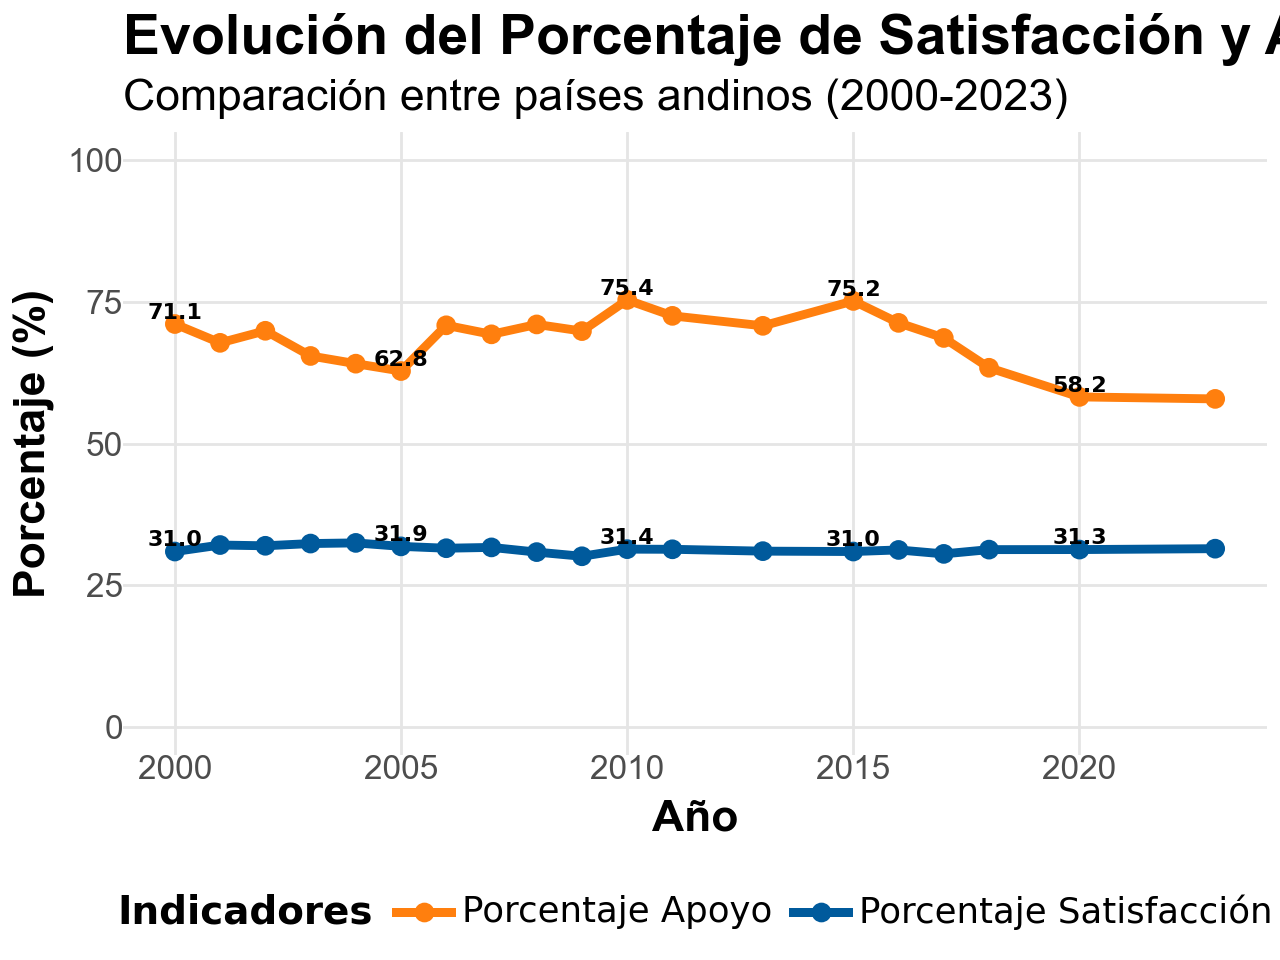

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, geom_text, labs, theme_minimal, theme, scale_color_manual, element_text, scale_y_continuous

# Filtrar datos para países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']
df_andinos = df_clean[df_clean['Pais'].isin(paises_andinos)]

# Calcular promedio de satisfacción por año para países andinos
satisfaccion_andina = (
    df_andinos.groupby('NUMINVES')['SATISFACCION']
    .value_counts(normalize=True).unstack(fill_value=0) * 100
)
promedio_satisfaccion_andinos = satisfaccion_andina[[1, 2, 3]].mean(axis=1)

# Calcular promedio de apoyo por año para países andinos
df_andinos['APOYO'] = df_andinos['APOYO'].replace({
    1: 1,  # Apoyo pleno
    2: 0.5,  # Apoyo medio
    3: 0   # Sin apoyo
})
promedio_apoyo_andinos = (
    df_andinos.groupby('NUMINVES')['APOYO'].mean() * 100
)

# Crear dataframe para graficar
df_plot = pd.DataFrame({
    'Año': promedio_satisfaccion_andinos.index,
    'Porcentaje Satisfacción': promedio_satisfaccion_andinos.values,
    'Porcentaje Apoyo': promedio_apoyo_andinos.values
}).melt(id_vars='Año', var_name='Indicador', value_name='Porcentaje')

# Filtrar para valores cada 5 años
df_labels = df_plot[df_plot['Año'] % 5 == 0]

# Crear el gráfico
plot = (
    ggplot(df_plot, aes(x='Año', y='Porcentaje', color='Indicador')) +
    geom_line(size=1.8) +  # Líneas más gruesas
    geom_point(size=3) +  # Puntos
    # Añadir etiquetas encima de los puntos
    geom_text(
        data=df_labels,
        mapping=aes(label='round(Porcentaje, 1)'),
        size=8,
        nudge_y=2,  # Desplazamiento hacia arriba
        color='black',
        fontweight='bold'  # Negrita para énfasis
    ) +
    labs(
        title='Evolución del Porcentaje de Satisfacción y Apoyo a la Democracia',
        subtitle='Comparación entre países andinos (2000-2023)',
        x='Año',
        y='Porcentaje (%)',
        color='Indicadores'
    ) +
    scale_color_manual(values={
        'Porcentaje Satisfacción': '#005A9C',  # Azul oscuro para satisfacción
        'Porcentaje Apoyo': '#FF7F0E'  # Naranja oscuro para apoyo
    }) +
    scale_y_continuous(limits=(0, 100)) +  # Escala de 0 a 100
    theme_minimal(base_size=16) +
    theme(
        legend_title=element_text(face='bold', size=14),
        legend_position='bottom',
        plot_title=element_text(size=20, face='bold', family='Arial'),
        plot_subtitle=element_text(size=16, family='Arial'),
        axis_title_x=element_text(face='bold', family='Arial'),
        axis_title_y=element_text(face='bold', family='Arial'),
        axis_text=element_text(size=12, family='Arial'),
        panel_grid_minor=element_blank()  # Sin grilla menor
    )
)

# Mostrar el gráfico
print(plot)


C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10144\2528133816.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_10144\2528133816.py:101: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


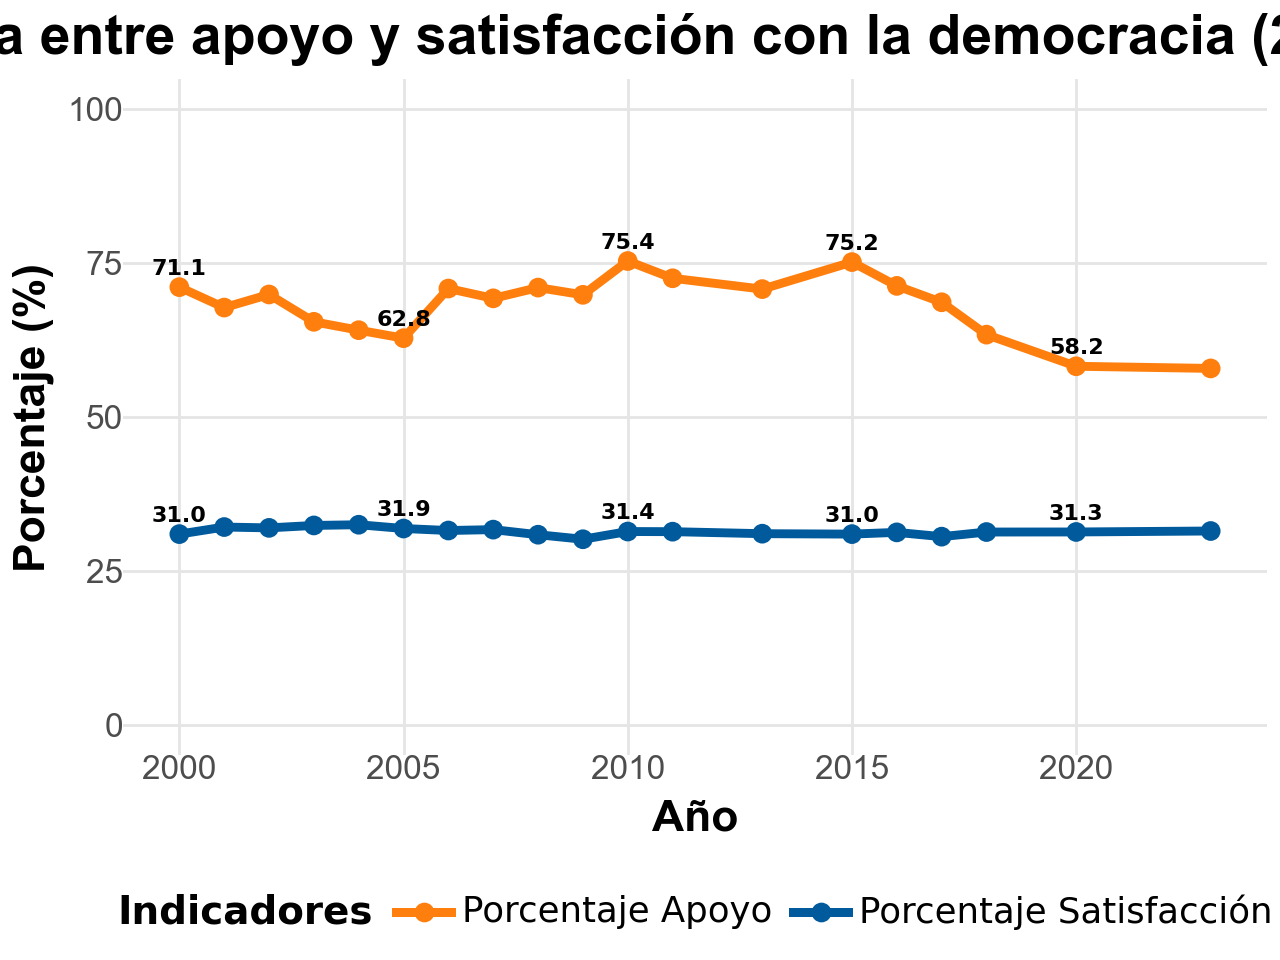

In [34]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, geom_text, labs, theme_minimal, theme, scale_color_manual, element_text, scale_y_continuous

# Crear el dataframe para los países andinos (simulado)
# Usar tus datos originales aquí
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']

# Calcular datos
df_andinos = df_clean[df_clean['Pais'].isin(paises_andinos)]

satisfaccion_andina = (
    df_andinos.groupby('NUMINVES')['SATISFACCION']
    .value_counts(normalize=True).unstack(fill_value=0) * 100
)
promedio_satisfaccion_andinos = satisfaccion_andina[[1, 2, 3]].mean(axis=1)

std_satisfaccion = satisfaccion_andina[[1, 2, 3]].std(axis=1)
margin_error_satisfaccion = 1.96 * (std_satisfaccion / (len(df_andinos) ** 0.5))

df_andinos['APOYO'] = df_andinos['APOYO'].replace({
    1: 1,  # Apoyo pleno
    2: 0.5,  # Apoyo medio
    3: 0   # Sin apoyo
})
promedio_apoyo_andinos = (
    df_andinos.groupby('NUMINVES')['APOYO'].mean() * 100
)
std_apoyo = df_andinos.groupby('NUMINVES')['APOYO'].std()
margin_error_apoyo = 1.96 * (std_apoyo / (len(df_andinos) ** 0.5))

# Crear dataframe
df_plot = pd.DataFrame({
    'Año': promedio_satisfaccion_andinos.index,
    'Porcentaje Satisfacción': promedio_satisfaccion_andinos.values,
    'Margen Inferior Satisfacción': promedio_satisfaccion_andinos.values - margin_error_satisfaccion.values,
    'Margen Superior Satisfacción': promedio_satisfaccion_andinos.values + margin_error_satisfaccion.values,
    'Porcentaje Apoyo': promedio_apoyo_andinos.values,
    'Margen Inferior Apoyo': promedio_apoyo_andinos.values - margin_error_apoyo.values,
    'Margen Superior Apoyo': promedio_apoyo_andinos.values + margin_error_apoyo.values
}).melt(
    id_vars=['Año'],
    value_vars=['Porcentaje Satisfacción', 'Porcentaje Apoyo'],
    var_name='Indicador',
    value_name='Porcentaje'
)

df_plot['Margen Inferior'] = df_plot.apply(
    lambda row: row['Porcentaje'] - margin_error_satisfaccion.loc[row['Año']]
    if row['Indicador'] == 'Porcentaje Satisfacción'
    else row['Porcentaje'] - margin_error_apoyo.loc[row['Año']], axis=1
)
df_plot['Margen Superior'] = df_plot.apply(
    lambda row: row['Porcentaje'] + margin_error_satisfaccion.loc[row['Año']]
    if row['Indicador'] == 'Porcentaje Satisfacción'
    else row['Porcentaje'] + margin_error_apoyo.loc[row['Año']], axis=1
)

# Crear gráfico
plot = (
    ggplot(df_plot, aes(x='Año', y='Porcentaje', color='Indicador')) +
    geom_line(size=1.8) +
    geom_point(size=3) +
    geom_errorbar(
        aes(ymin='Margen Inferior', ymax='Margen Superior'),
        width=0.2
    ) +
    geom_text(
        data=df_plot[df_plot['Año'] % 5 == 0],
        mapping=aes(label='round(Porcentaje, 1)'),
        size=8,
        fontweight='bold',  # En negrita
        nudge_y=3,
        color='black'
    ) +
    labs(
        title='Brecha entre apoyo y satisfacción con la democracia (2000-2023)',
        subtitle='',
        x='Año',
        y='Porcentaje (%)',
        color='Indicadores'
    ) +
    scale_color_manual(values={
        'Porcentaje Satisfacción': '#005A9C',
        'Porcentaje Apoyo': '#FF7F0E'
    }) +
    scale_y_continuous(limits=(0, 100)) +
    theme_minimal(base_size=16) +
    theme(
        legend_title=element_text(face='bold', size=14),
        legend_position='bottom',
        plot_title=element_text(size=20, face='bold', family='Arial'),
        plot_subtitle=element_text(size=16, family='Arial'),
        axis_title_x=element_text(face='bold', family='Arial'),
        axis_title_y=element_text(face='bold', family='Arial'),
        axis_text=element_text(size=12, family='Arial'),
        panel_grid_minor=element_blank()
    )
)

# Mostrar el gráfico
print(plot)


In [35]:
from plotnine import save_as_pdf_pages

# Guardar el gráfico en formato PNG
plot.save(
    filename="evolucion_satisfaccion_apoyo.png",
    dpi=300,  # Resolución alta
    width=12,  # Ancho en pulgadas
    height=8,  # Altura en pulgadas
    units="in"  # Unidades en pulgadas
)

c:\Users\Nicolas Silva\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 12 x 8 in image.
c:\Users\Nicolas Silva\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: evolucion_satisfaccion_apoyo.png


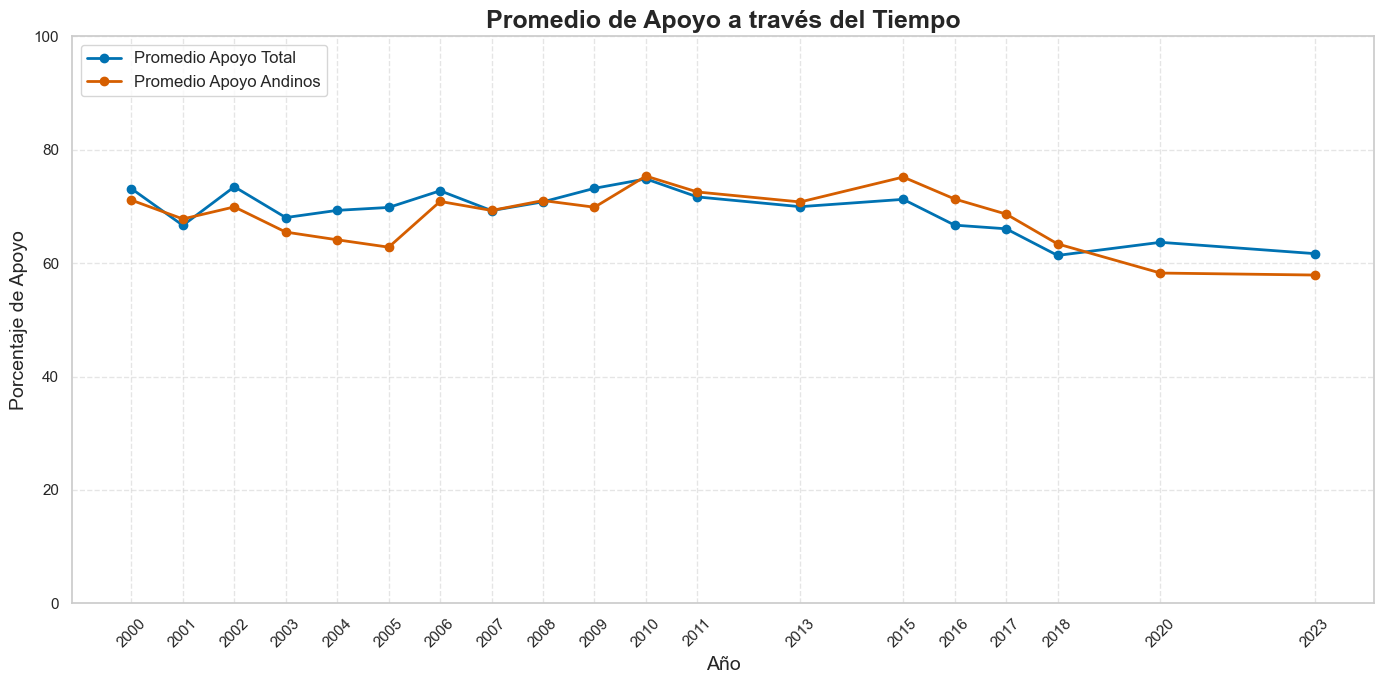

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear la variable de APOYO a valores numéricos
df_clean['APOYO'] = df_clean['APOYO'].replace({
    1: 1,  # Apoyo pleno
    2: 0.5,  # Apoyo medio
    3: 0   # Sin apoyo
})

# Calcular el promedio de apoyo por año (NUMINVES) para todos los países
promedio_apoyo_total = df_clean.groupby('NUMINVES')['APOYO'].mean() * 100

# Calcular el promedio de apoyo por año para los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']
promedio_apoyo_andinos = df_clean[df_clean['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean() * 100

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Graficar usando Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(promedio_apoyo_total.index, promedio_apoyo_total, marker='o', label='Promedio Apoyo Total', color='#0072B2', linewidth=2)
plt.plot(promedio_apoyo_andinos.index, promedio_apoyo_andinos, marker='o', label='Promedio Apoyo Andinos', color='#D55E00', linewidth=2)

# Añadir etiquetas y título
plt.title('Promedio de Apoyo a través del Tiempo', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje de Apoyo', fontsize=14)

# Asegurarse de que se muestren los años
plt.xticks(promedio_apoyo_total.index, rotation=45)

# Ajustar el eje Y para que se vea del 0 al 100
plt.ylim(0, 100)

# Mejorar la estética
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


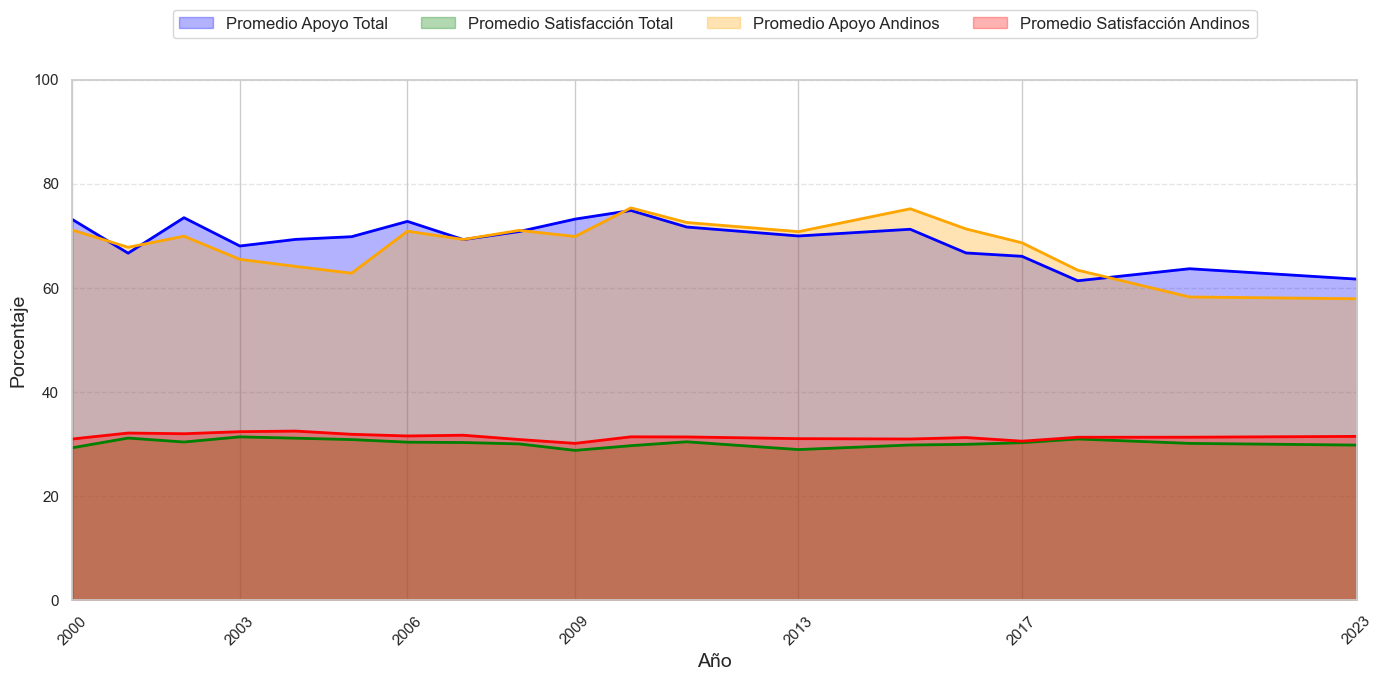

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de satisfacción por año (NUMINVES) para todos los países
promedio_satisfaccion_total = promedio_total
promedio_satisfaccion_andinos = promedio_andinos

# Crear un DataFrame para el gráfico
plot_data = pd.DataFrame({
    'Año': promedio_apoyo_total.index,
    'Promedio Apoyo Total': promedio_apoyo_total,
    'Promedio Satisfacción Total': promedio_satisfaccion_total,
    'Promedio Apoyo Andinos': promedio_apoyo_andinos,
    'Promedio Satisfacción Andinos': promedio_satisfaccion_andinos
})

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Graficar usando un gráfico de área
plt.figure(figsize=(14, 7))

# Gráfico para América Latina
plt.fill_between(plot_data['Año'], plot_data['Promedio Apoyo Total'], color='blue', alpha=0.3, label='Promedio Apoyo Total')
plt.plot(plot_data['Año'], plot_data['Promedio Apoyo Total'], color='blue', linewidth=2)

plt.fill_between(plot_data['Año'], plot_data['Promedio Satisfacción Total'], color='green', alpha=0.3, label='Promedio Satisfacción Total')
plt.plot(plot_data['Año'], plot_data['Promedio Satisfacción Total'], color='green', linewidth=2)

# Gráfico para Países Andinos
plt.fill_between(plot_data['Año'], plot_data['Promedio Apoyo Andinos'], color='orange', alpha=0.3, label='Promedio Apoyo Andinos')
plt.plot(plot_data['Año'], plot_data['Promedio Apoyo Andinos'], color='orange', linewidth=2)

plt.fill_between(plot_data['Año'], plot_data['Promedio Satisfacción Andinos'], color='red', alpha=0.3, label='Promedio Satisfacción Andinos')
plt.plot(plot_data['Año'], plot_data['Promedio Satisfacción Andinos'], color='red', linewidth=2)

# Añadir etiquetas y título
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)

# Asegurarse de que se muestren los años
plt.xticks(plot_data['Año'][::3], rotation=45)  # Cada tres años

# Ajustar el eje Y para que se vea del 0 al 100
plt.ylim(0, 100)
plt.xlim(plot_data['Año'].min(), plot_data['Año'].max())  # Asegurarse de que el 2000 esté pegado al eje Y

# Mejorar la estética
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)  # Centrar la leyenda en la parte superior
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


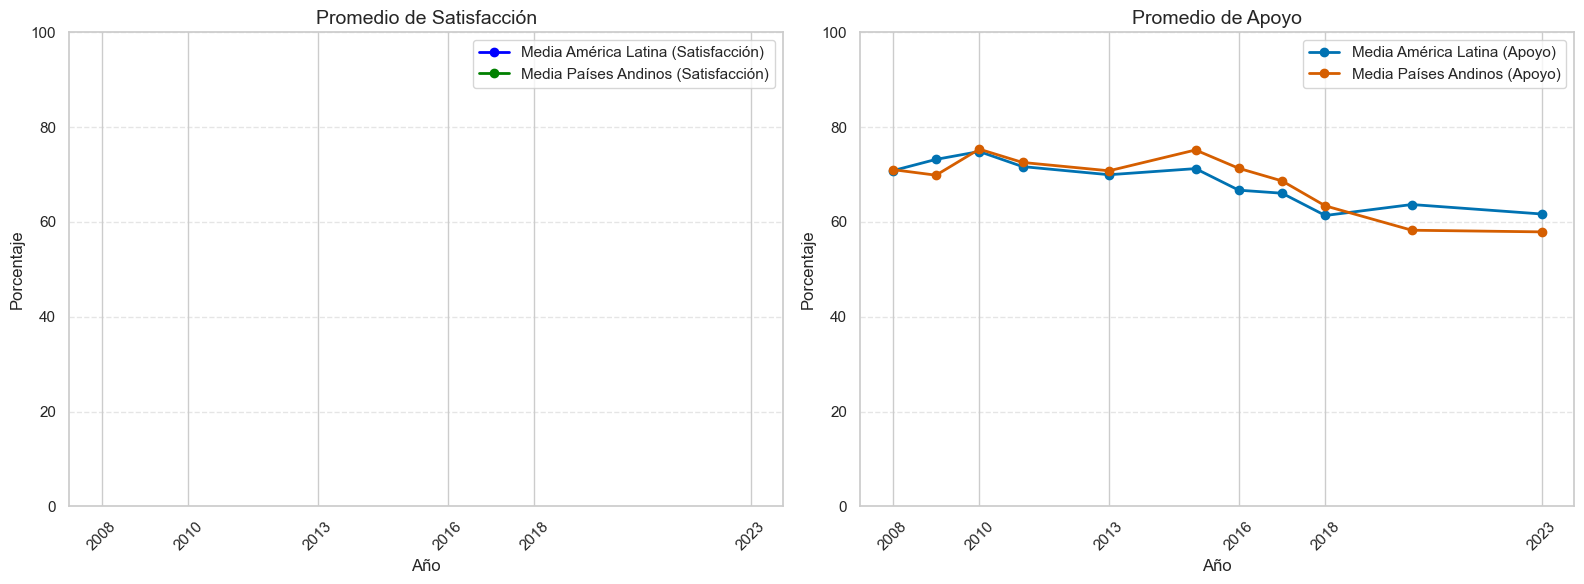

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo los años de 2008 a 2023
df_clean_filtered = df_clean[df_clean['NUMINVES'].between(2008, 2023)]

# Definir los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']

# Calcular el promedio de apoyo por año para todos los países y los países andinos
promedio_apoyo_total = df_clean_filtered.groupby('NUMINVES')['APOYO'].mean() * 100
promedio_apoyo_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean() * 100

# Calcular el promedio de satisfacción por año para todos los países y los países andinos
promedio_satisfaccion_total = df_clean_filtered.groupby('NUMINVES')['SATISFACCION'].mean() * 100
promedio_satisfaccion_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['SATISFACCION'].mean() * 100

# Estilo similar a ggplot
sns.set_theme(style="whitegrid")

# Crear una figura con dos subgráficas, una para satisfacción y otra para apoyo
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Satisfacción
axs[0].plot(promedio_satisfaccion_total.index, promedio_satisfaccion_total, marker='o', label='Media América Latina (Satisfacción)', color='blue', linewidth=2)
axs[0].plot(promedio_satisfaccion_andinos.index, promedio_satisfaccion_andinos, marker='o', label='Media Países Andinos (Satisfacción)', color='green', linewidth=2)

# Añadir etiquetas y título para satisfacción
axs[0].set_xlabel('Año', fontsize=12)
axs[0].set_ylabel('Porcentaje', fontsize=12)
axs[0].set_title('Promedio de Satisfacción', fontsize=14)
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)
axs[0].legend()

# Ajustar el eje X para mostrar solo algunos años
axs[0].set_xticks(promedio_satisfaccion_total.index[::2])  # Muestra cada 2 años
axs[0].set_xticklabels(promedio_satisfaccion_total.index[::2], rotation=45, ha='center')  # Ajusta la rotación y centrado

# Gráfico de Apoyo
axs[1].plot(promedio_apoyo_total.index, promedio_apoyo_total, marker='o', label='Media América Latina (Apoyo)', color='#0072B2', linewidth=2)
axs[1].plot(promedio_apoyo_andinos.index, promedio_apoyo_andinos, marker='o', label='Media Países Andinos (Apoyo)', color='#D55E00', linewidth=2)

# Añadir etiquetas y título para apoyo
axs[1].set_xlabel('Año', fontsize=12)
axs[1].set_ylabel('Porcentaje', fontsize=12)
axs[1].set_title('Promedio de Apoyo', fontsize=14)
axs[1].set_ylim(0, 100)
axs[1].grid(axis='y', linestyle='--', alpha=0.5)
axs[1].legend()

# Ajustar el eje X para mostrar solo algunos años
axs[1].set_xticks(promedio_apoyo_total.index[::2])  # Muestra cada 2 años
axs[1].set_xticklabels(promedio_apoyo_total.index[::2], rotation=45, ha='center')  # Ajusta la rotación y centrado

# Ajustar el layout
plt.tight_layout()
plt.show()

In [ ]:
#df_clean.to_csv('grand_merge_2.csv', index=False)


In [ ]:
import pandas as pd
import altair as alt

# Filtrar el DataFrame para incluir solo los años de 2008 a 2023
df_clean_filtered = df_clean[df_clean['NUMINVES'].between(2008, 2023)]

# Definir los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']

# Calcular el promedio de apoyo por año para los países andinos y multiplicar por 100
promedio_apoyo_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean().reset_index()
promedio_apoyo_andinos['APOYO'] *= 100  # Convertir a porcentaje

# Calcular el promedio de satisfacción por año para los países andinos y multiplicar por 10
promedio_satisfaccion_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['SATISFACCION'].mean().reset_index()
promedio_satisfaccion_andinos['SATISFACCION'] *= 10  # Convertir a porcentaje

# Calcular el promedio de apoyo por año para toda América Latina y multiplicar por 100
promedio_apoyo_latam = df_clean_filtered.groupby('NUMINVES')['APOYO'].mean().reset_index()
promedio_apoyo_latam['APOYO'] *= 100  # Convertir a porcentaje

# Calcular el promedio de satisfacción por año para toda América Latina y multiplicar por 10
promedio_satisfaccion_latam = df_clean_filtered.groupby('NUMINVES')['SATISFACCION'].mean().reset_index()
promedio_satisfaccion_latam['SATISFACCION'] *= 10  # Convertir a porcentaje

# Identificar los últimos 3 años en los datos
ultimos_3_anos = df_clean_filtered['NUMINVES'].drop_duplicates().sort_values().tail(3).tolist()

# Crear gráficos de Altair con tamaños consistentes y colores en tonos de azul
# Gráfico de Apoyo
chart_apoyo_andinos = alt.Chart(promedio_apoyo_andinos).mark_line(point=True).encode(
    x=alt.X('NUMINVES:O', title='Año'),
    y=alt.Y('APOYO:Q', title='Porcentaje de Apoyo (%)', scale=alt.Scale(domain=[0, 100])),
    color=alt.value('#1f77b4'),  # Azul oscuro
    tooltip=['NUMINVES:O', 'APOYO:Q'],
    strokeWidth=alt.condition(
        alt.FieldOneOfPredicate(field='NUMINVES', oneOf=ultimos_3_anos),
        alt.value(3),  # Grosor para los últimos 3 años
        alt.value(2)   # Grosor para los años anteriores
    )
).properties(
    width=400,
    height=300
)

chart_apoyo_latam = alt.Chart(promedio_apoyo_latam).mark_line(point=True, strokeDash=[5, 2]).encode(
    x=alt.X('NUMINVES:O', title='Año'),
    y=alt.Y('APOYO:Q', title='Porcentaje de Apoyo (%)', scale=alt.Scale(domain=[0, 100])),
    color=alt.value('#aec7e8'),  # Azul claro
    tooltip=['NUMINVES:O', 'APOYO:Q'],
    strokeWidth=alt.condition(
        alt.FieldOneOfPredicate(field='NUMINVES', oneOf=ultimos_3_anos),
        alt.value(3),
        alt.value(2)
    )
).properties(
    width=400,
    height=300
)

# Gráfico de Satisfacción
chart_satisfaccion_andinos = alt.Chart(promedio_satisfaccion_andinos).mark_line(point=True).encode(
    x=alt.X('NUMINVES:O', title='Año'),
    y=alt.Y('SATISFACCION:Q', title='Porcentaje de Satisfacción (%)', scale=alt.Scale(domain=[0, 100])),
    color=alt.value('#1f77b4'),  # Azul oscuro
    tooltip=['NUMINVES:O', 'SATISFACCION:Q'],
    strokeWidth=alt.condition(
        alt.FieldOneOfPredicate(field='NUMINVES', oneOf=ultimos_3_anos),
        alt.value(3),
        alt.value(2)
    )
).properties(
    width=400,
    height=300
)

chart_satisfaccion_latam = alt.Chart(promedio_satisfaccion_latam).mark_line(point=True, strokeDash=[5, 2]).encode(
    x=alt.X('NUMINVES:O', title='Año'),
    y=alt.Y('SATISFACCION:Q', title='Porcentaje de Satisfacción (%)', scale=alt.Scale(domain=[0, 100])),
    color=alt.value('#aec7e8'),  # Azul claro
    tooltip=['NUMINVES:O', 'SATISFACCION:Q'],
    strokeWidth=alt.condition(
        alt.FieldOneOfPredicate(field='NUMINVES', oneOf=ultimos_3_anos),
        alt.value(3),
        alt.value(2)
    )
).properties(
    width=400,
    height=300
)

# Combinar los gráficos con títulos en cada panel
combined_chart_apoyo = (chart_apoyo_andinos + chart_apoyo_latam).properties(
    title='Promedio de Apoyo: Países Andinos vs. América Latina (2008-2023)'
)

combined_chart_satisfaccion = (chart_satisfaccion_andinos + chart_satisfaccion_latam).properties(
    title='Promedio de Satisfacción: Países Andinos vs. América Latina (2008-2023)'
)

# Concatenar los gráficos horizontalmente
final_chart = alt.hconcat(combined_chart_apoyo, combined_chart_satisfaccion).configure_axis(
    grid=True,  # Sin líneas de cuadrícula para un aspecto más limpio
    labelFontSize=12,
    titleFontSize=14,
    labelColor='#666666',
    titleColor='#333333'
).configure_title(
    fontSize=16,
    anchor='start',
    color='#333333'
).configure_view(
    strokeWidth=1  # Sin bordes alrededor del gráfico
)

# Mostrar el gráfico final
final_chart


alt.HConcatChart(...)

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_12956\692277705.py:80: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


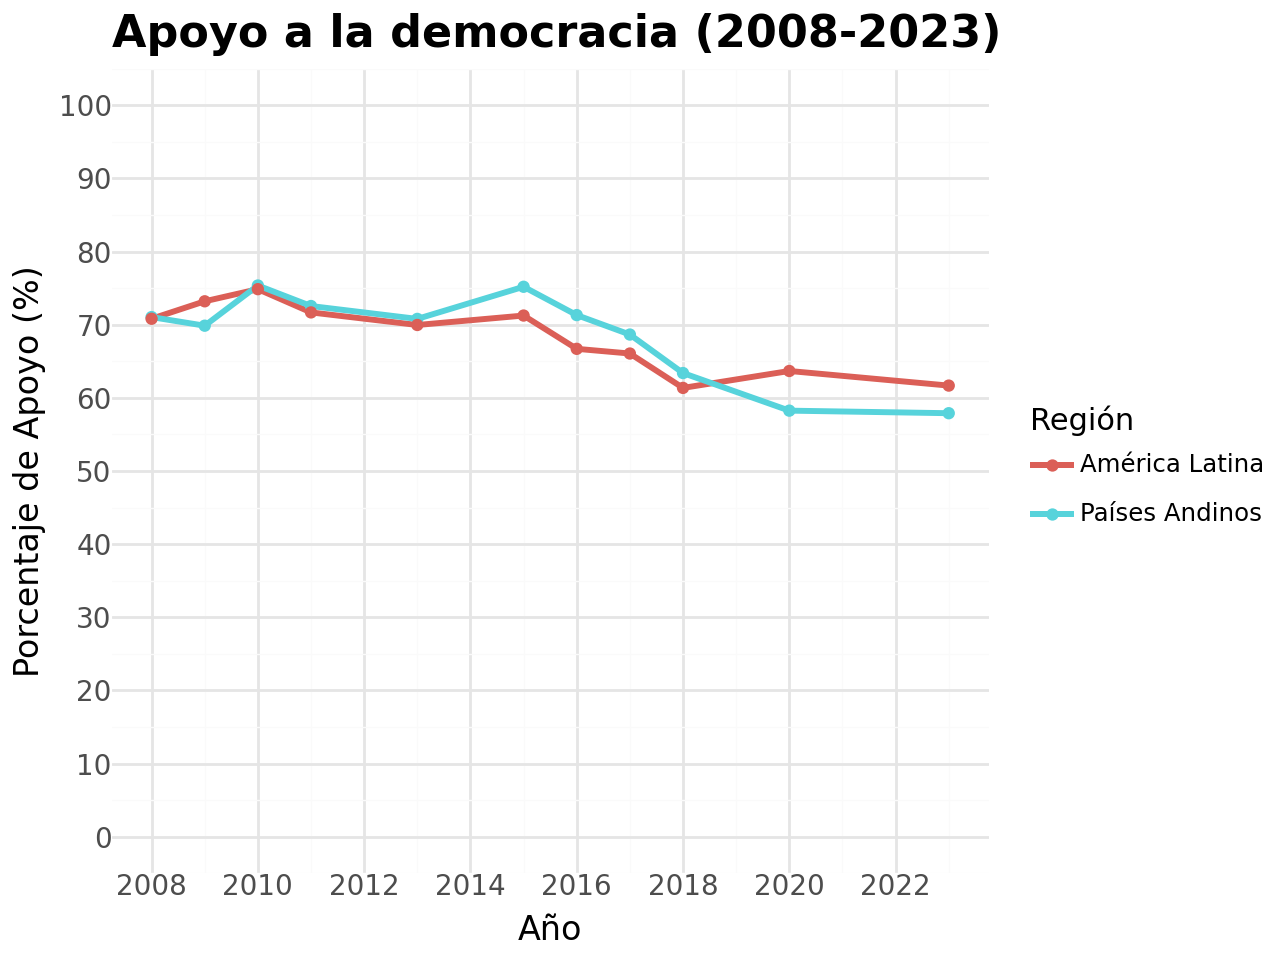

C:\Users\Nicolas Silva\AppData\Local\Temp\ipykernel_12956\692277705.py:81: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


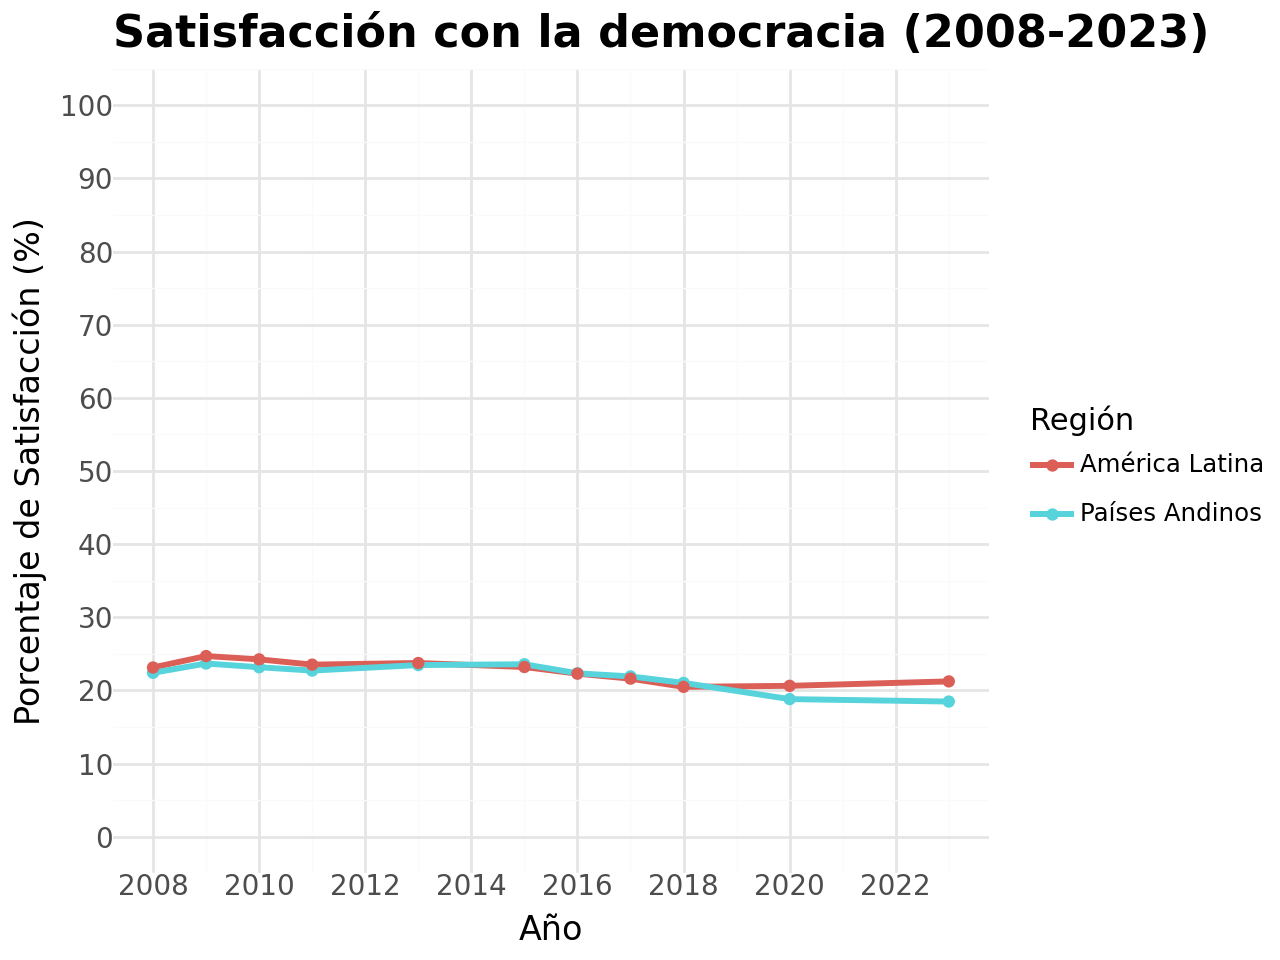

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_line, geom_point, scale_y_continuous, scale_x_continuous,
    labs, theme_minimal, theme, element_text, guides, guide_legend
)

# Filtrar el DataFrame para incluir solo los años de 2008 a 2023
df_clean_filtered = df_clean[df_clean['NUMINVES'].between(2008, 2023)]

# Definir los países andinos
paises_andinos = ['Perú', 'Colombia', 'Ecuador', 'Bolivia']

# Calcular el promedio de apoyo por año para los países andinos y multiplicar por 100
promedio_apoyo_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['APOYO'].mean().reset_index()
promedio_apoyo_andinos['APOYO'] *= 100  # Convertir a porcentaje
promedio_apoyo_andinos['Region'] = 'Países Andinos'

# Calcular el promedio de apoyo por año para toda América Latina y multiplicar por 100
promedio_apoyo_latam = df_clean_filtered.groupby('NUMINVES')['APOYO'].mean().reset_index()
promedio_apoyo_latam['APOYO'] *= 100  # Convertir a porcentaje
promedio_apoyo_latam['Region'] = 'América Latina'

# Combinar los datos de apoyo
datos_apoyo = pd.concat([promedio_apoyo_andinos, promedio_apoyo_latam])

# Gráfico de Apoyo usando plotnine
plot_apoyo = (
    ggplot(datos_apoyo, aes(x='NUMINVES', y='APOYO', color='Region')) +
    geom_line(size=1.2) +
    geom_point() +
    scale_y_continuous(limits=[0, 100], breaks=range(0, 101, 10)) +
    scale_x_continuous(breaks=range(2008, 2024, 2)) +
    labs(title='Apoyo a la democracia (2008-2023)',
         x='Año', y='Porcentaje de Apoyo (%)', color='Región') +
    theme_minimal() +
    theme(
        plot_title=element_text(size=16, face='bold', ha='left'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(size=10),
        axis_text_y=element_text(size=10),
        legend_position='right'
    )
)

# Calcular el promedio de satisfacción por año para los países andinos y multiplicar por 10
promedio_satisfaccion_andinos = df_clean_filtered[df_clean_filtered['Pais'].isin(paises_andinos)].groupby('NUMINVES')['SATISFACCION'].mean().reset_index()
promedio_satisfaccion_andinos['SATISFACCION'] *= 10  # Convertir a porcentaje
promedio_satisfaccion_andinos['Region'] = 'Países Andinos'

# Calcular el promedio de satisfacción por año para toda América Latina y multiplicar por 10
promedio_satisfaccion_latam = df_clean_filtered.groupby('NUMINVES')['SATISFACCION'].mean().reset_index()
promedio_satisfaccion_latam['SATISFACCION'] *= 10  # Convertir a porcentaje
promedio_satisfaccion_latam['Region'] = 'América Latina'

# Combinar los datos de satisfacción
datos_satisfaccion = pd.concat([promedio_satisfaccion_andinos, promedio_satisfaccion_latam])

# Gráfico de Satisfacción usando plotnine
plot_satisfaccion = (
    ggplot(datos_satisfaccion, aes(x='NUMINVES', y='SATISFACCION', color='Region')) +
    geom_line(size=1.2) +
    geom_point() +
    scale_y_continuous(limits=[0, 100], breaks=range(0, 101, 10)) +
    scale_x_continuous(breaks=range(2008, 2024, 2)) +
    labs(title='Satisfacción con la democracia (2008-2023)',
         x='Año', y='Porcentaje de Satisfacción (%)', color='Región') +
    theme_minimal() +
    theme(
        plot_title=element_text(size=16, face='bold', ha='left'),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(size=10),
        axis_text_y=element_text(size=10),
        legend_position='right'
    )
)

# Mostrar los gráficos
print(plot_apoyo)
print(plot_satisfaccion)
